# Sales Prediction of Shampoo Products Using ARIMA Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Extract date-time related information using a Data based column

In [2]:
# Date Formate -> YYYY-MM-DD
data=pd.DataFrame({'Date':['2022-10-05','2021-07-18','2017-03-28','2020-04-06','2020-11-18']})
data.head()

,Date
0,2022-10-05
1,2021-07-18
2,2017-03-28
3,2020-04-06
4,2020-11-18


In [3]:
data.dtypes

Date    object
dtype: object

#### From date column, extract Year, Quarter, Month, Day, WeekNumber

In [4]:
data['Date']=pd.to_datetime(data['Date'])
data.dtypes

Date    datetime64[ns]
dtype: object

In [5]:
data['year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Quarter']=data['Date'].dt.quarter
data['Day']=data['Date'].dt.day
data['Weeknum']=data['Date'].dt.weekday
data.head()

,Date,year,Month,Quarter,Day,Weeknum
0,2022-10-05,2022,10,4,5,2
1,2021-07-18,2021,7,3,18,6
2,2017-03-28,2017,3,1,28,1
3,2020-04-06,2020,4,2,6,0
4,2020-11-18,2020,11,4,18,2


### Time Series Forecassting
Time Series forecasting is forecasting of future values based on past time series(previous) values

#### Terminologies
<b>1) Trend</b><br>
Increasting or decreasing time series values if referred to as Trend

<b>2) Seasonality</b><br>
Periodic flutuations based on certain seasons.

<b>3) Stationary</b><br>
Time Series data must be stationary before making predictions

For a stationary time series data, the following conclusions must hold<br>
1) Constant Mean<br>
2) Constant Variance<br>
3) Non-Seasonality and No Trend

In [6]:
df=pd.read_csv('shampoo.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [7]:
df.shape

(36, 2)

In [8]:
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [9]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [10]:
from datetime import datetime

In [11]:
r = datetime.strptime('2024-07-03 01:01:01',"%Y-%m-%d %H:%M:%S")
print(r,type(r))

2024-07-03 01:01:01 <class 'datetime.datetime'>


In [12]:
def parser(x):
    return '202' + x

# Read the CSV file without parsing dates
df = pd.read_csv('shampoo.csv', index_col=[0])

# Convert the date column after reading the CSV file
df.index = pd.to_datetime(df.index.map(parser), format='%Y-%m')
df.head()

,Sales
Month,
2021-01-01,266.0
2021-02-01,145.9
2021-03-01,183.1
2021-04-01,119.3
2021-05-01,180.3


In [13]:
df.tail()

,Sales
Month,
2023-08-01,407.6
2023-09-01,682.0
2023-10-01,475.3
2023-11-01,581.3
2023-12-01,646.9


In [14]:
df.shape
# 2021-01-01 to 2023-12-01 ->3 years

(36, 1)

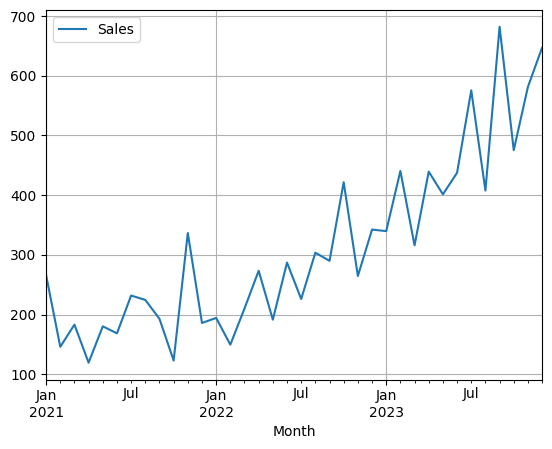

In [15]:
df.plot()
plt.grid()
plt.show()

### Decomposition
Time series data can be decomposed into original component, its trend, its seasonality and its residuals

1) Additive Decomposition - $ y_{t}  $ = Original + Trend + Seasonality + Noise(Residuals)

1) Multiplicative Decomposition - $ y_{t}  $ = Original * Trend * Seasonality * Noise(Residuals)

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

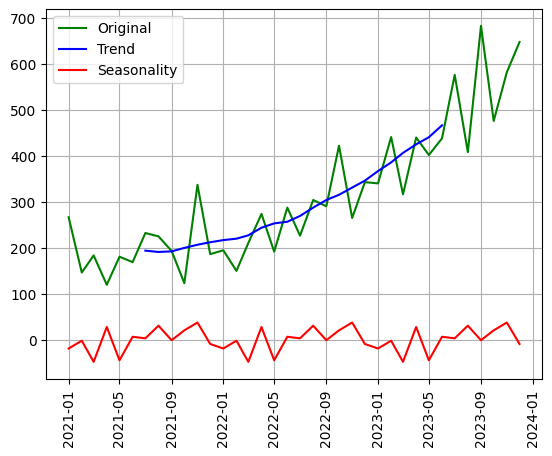

In [17]:
decom = seasonal_decompose(df,model='additive')
# decom = seasonal_decompose(df,model='multiplicative')

observed = decom.observed
trend = decom.trend
seasonal = decom.seasonal
residual = decom.resid

plt.plot(observed,color='green',label='Original')
plt.plot(trend,color='blue',label='Trend')
plt.plot(seasonal,color='red',label='Seasonality')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

### Reduce/Remove Trend and/or seasonality

1) Differencing (based on Lag features)<br>
2) Rolling Mean and Rolling Std<br>
3) Log or Exponential Smoothing<br>
4) Log Differencing<br>

In [18]:
df.head()

,Sales
Month,
2021-01-01,266.0
2021-02-01,145.9
2021-03-01,183.1
2021-04-01,119.3
2021-05-01,180.3


#### a) Lag Features

In [19]:
df['Lag1'] = df['Sales'].shift(1)
df['Lag2'] = df['Sales'].shift(2)
df.head()

,Sales,Lag1,Lag2
Month,,,
2021-01-01,266.0,NaN,NaN
2021-02-01,145.9,266.0,NaN
2021-03-01,183.1,145.9,266.0
2021-04-01,119.3,183.1,145.9
2021-05-01,180.3,119.3,183.1


#### b) Differencing

In [20]:
df['Diff1'] = df['Sales'] - df['Lag1'] #order 1
df['Diff2'] = df['Sales'] - df['Lag2'] #order 2
df.head()

,Sales,Lag1,Lag2,Diff1,Diff2
Month,,,,,
2021-01-01,266.0,NaN,NaN,NaN,NaN
2021-02-01,145.9,266.0,NaN,-120.1,NaN
2021-03-01,183.1,145.9,266.0,37.2,-82.9
2021-04-01,119.3,183.1,145.9,-63.8,-26.6
2021-05-01,180.3,119.3,183.1,61.0,-2.8


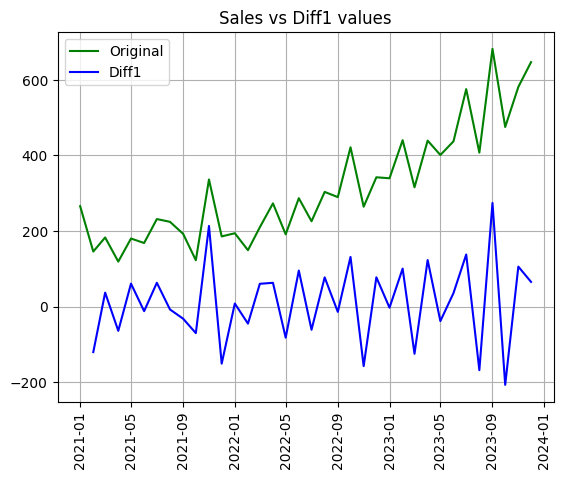

In [21]:
plt.plot(df['Sales'],color='green',label='Original')
plt.plot(df['Diff1'],color='blue',label='Diff1')
plt.title('Sales vs Diff1 values')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

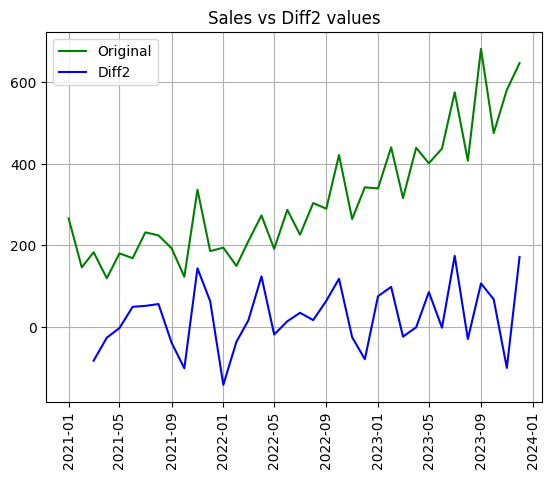

In [22]:
plt.plot(df['Sales'],color='green',label='Original')
plt.plot(df['Diff2'],color='blue',label='Diff2')
plt.title('Sales vs Diff2 values')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

#### c) Rolling mean and Rolling Std

In [23]:
df.head()

,Sales,Lag1,Lag2,Diff1,Diff2
Month,,,,,
2021-01-01,266.0,NaN,NaN,NaN,NaN
2021-02-01,145.9,266.0,NaN,-120.1,NaN
2021-03-01,183.1,145.9,266.0,37.2,-82.9
2021-04-01,119.3,183.1,145.9,-63.8,-26.6
2021-05-01,180.3,119.3,183.1,61.0,-2.8


In [24]:
df['Roll_Mean'] = df['Sales'].rolling(window=2).mean() # window=22 -> for 2 months
df['Roll_Std'] = df['Sales'].rolling(window=2).std()
df.head()

,Sales,Lag1,Lag2,Diff1,Diff2,Roll_Mean,Roll_Std
Month,,,,,,,
2021-01-01,266.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,145.9,266.0,NaN,-120.1,NaN,205.95,84.923524
2021-03-01,183.1,145.9,266.0,37.2,-82.9,164.50,26.304372
2021-04-01,119.3,183.1,145.9,-63.8,-26.6,151.20,45.113413
2021-05-01,180.3,119.3,183.1,61.0,-2.8,149.80,43.133514


In [25]:
# How Roll_Mean works....
print((266+145.9)/2)
print((145.9+183.1)/2)

205.95
164.5


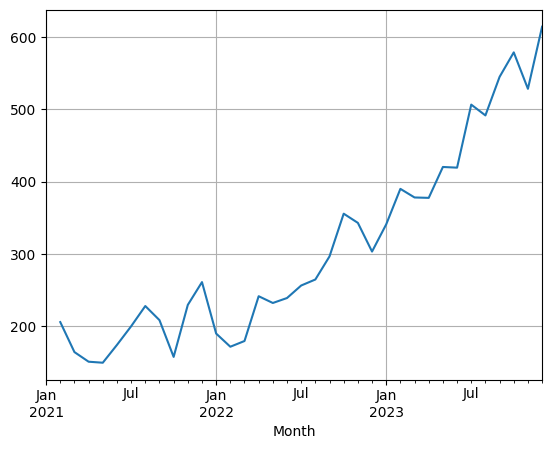

In [26]:
df['Roll_Mean'].plot()
plt.grid()
plt.show()

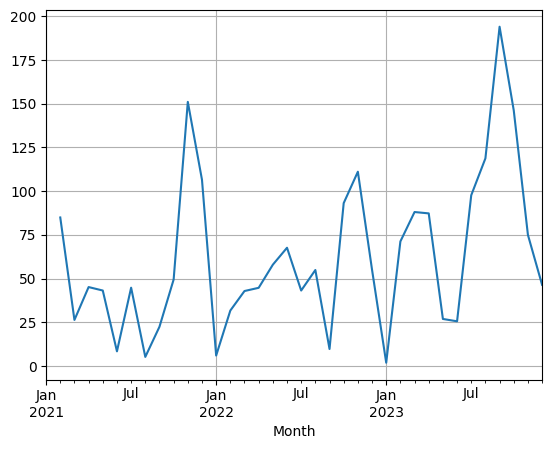

In [27]:
df['Roll_Std'].plot()
plt.grid()
plt.show()

In [28]:
def seas_decom(data):
    decom = seasonal_decompose(data,model='additive')

    observed = decom.observed
    trend = decom.trend
    seasonal = decom.seasonal
    residual = decom.resid

    plt.plot(observed,color='green',label='Original')
    plt.plot(trend,color='blue',label='Trend')
    plt.plot(seasonal,color='red',label='Seasonality')
    plt.xticks(rotation=90)
    plt.grid()
    plt.legend()
    plt.show()

In [29]:
df.head()

,Sales,Lag1,Lag2,Diff1,Diff2,Roll_Mean,Roll_Std
Month,,,,,,,
2021-01-01,266.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,145.9,266.0,NaN,-120.1,NaN,205.95,84.923524
2021-03-01,183.1,145.9,266.0,37.2,-82.9,164.50,26.304372
2021-04-01,119.3,183.1,145.9,-63.8,-26.6,151.20,45.113413
2021-05-01,180.3,119.3,183.1,61.0,-2.8,149.80,43.133514


In [30]:
df1=df.copy()
df1.head()

,Sales,Lag1,Lag2,Diff1,Diff2,Roll_Mean,Roll_Std
Month,,,,,,,
2021-01-01,266.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,145.9,266.0,NaN,-120.1,NaN,205.95,84.923524
2021-03-01,183.1,145.9,266.0,37.2,-82.9,164.50,26.304372
2021-04-01,119.3,183.1,145.9,-63.8,-26.6,151.20,45.113413
2021-05-01,180.3,119.3,183.1,61.0,-2.8,149.80,43.133514


In [31]:
df1.dropna(inplace=True)
df1.isnull().sum()

Sales        0
Lag1         0
Lag2         0
Diff1        0
Diff2        0
Roll_Mean    0
Roll_Std     0
dtype: int64

In [32]:
df1.head()

,Sales,Lag1,Lag2,Diff1,Diff2,Roll_Mean,Roll_Std
Month,,,,,,,
2021-03-01,183.1,145.9,266.0,37.2,-82.9,164.50,26.304372
2021-04-01,119.3,183.1,145.9,-63.8,-26.6,151.20,45.113413
2021-05-01,180.3,119.3,183.1,61.0,-2.8,149.80,43.133514
2021-06-01,168.5,180.3,119.3,-11.8,49.2,174.40,8.343860
2021-07-01,231.8,168.5,180.3,63.3,51.5,200.15,44.759859


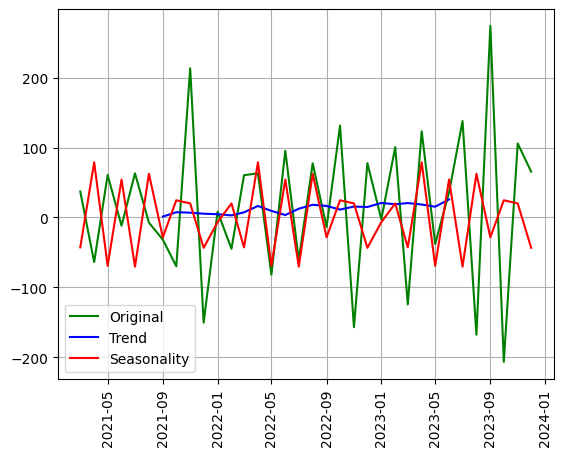

In [33]:
seas_decom(df1['Diff1'])

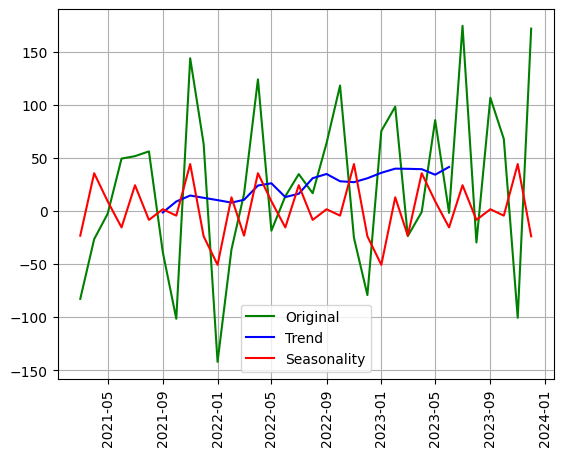

In [34]:
seas_decom(df1['Diff2'])

In [35]:
def plot_roll_features(data):
    roll_avg = data.rolling(window=12).mean() # window=12 -> for 12 months
    roll_std = data.rolling(window=12).std()

    plt.plot(data,color='blue',label='Original')
    plt.plot(roll_avg,color='red',label='Rolling Avg')
    plt.plot(roll_std,color='black',label='Rolling Std')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

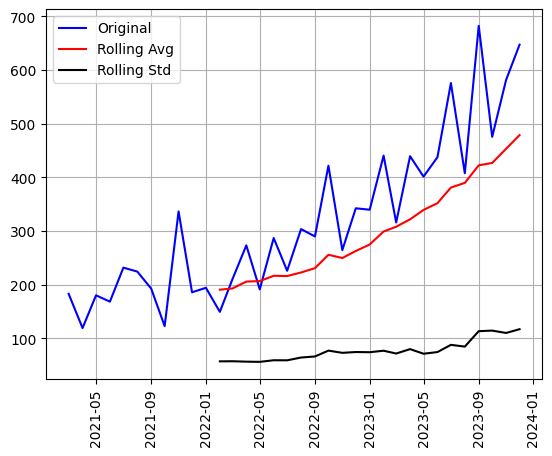

In [36]:
plot_roll_features(df1['Sales'])

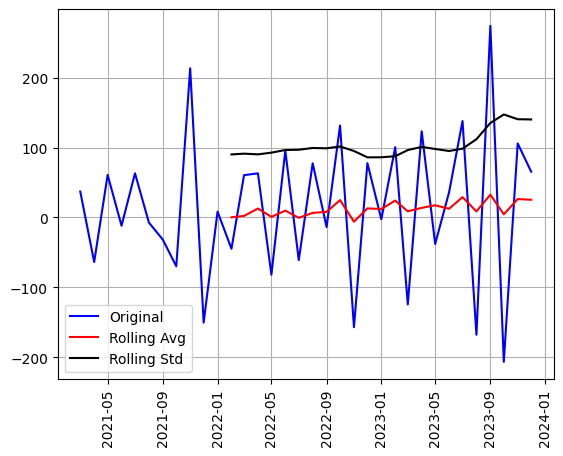

In [37]:
plot_roll_features(df1['Diff1'])

#### d) Log Smoothing

In [38]:
df['Log_sales'] = np.log(df['Sales'])
df.head()

,Sales,Lag1,Lag2,Diff1,Diff2,Roll_Mean,Roll_Std,Log_sales
Month,,,,,,,,
2021-01-01,266.0,NaN,NaN,NaN,NaN,NaN,NaN,5.583496
2021-02-01,145.9,266.0,NaN,-120.1,NaN,205.95,84.923524,4.982921
2021-03-01,183.1,145.9,266.0,37.2,-82.9,164.50,26.304372,5.210032
2021-04-01,119.3,183.1,145.9,-63.8,-26.6,151.20,45.113413,4.781641
2021-05-01,180.3,119.3,183.1,61.0,-2.8,149.80,43.133514,5.194622


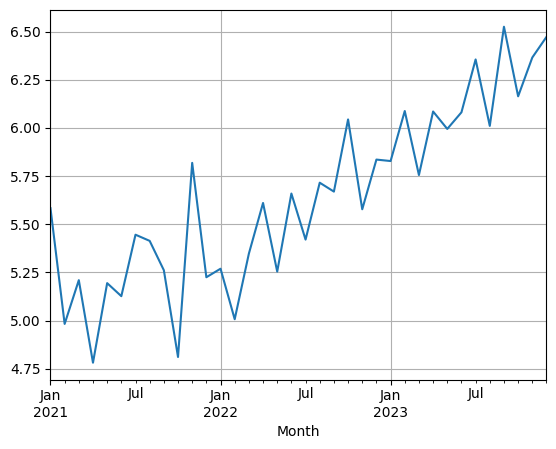

In [39]:
df['Log_sales'].plot()
plt.grid()
plt.show()

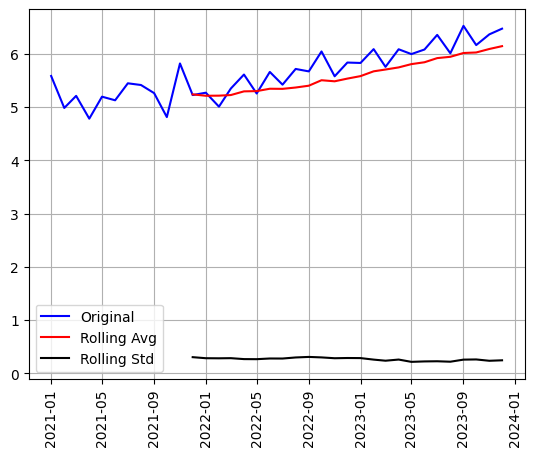

In [40]:
plot_roll_features(df['Log_sales'])

#### e) Log Differencing

In [41]:
df['Log_diff1'] = df['Log_sales'].diff(1)  # df['Log_sales'] - df['Log_sales'].shift(1)
df.head()

,Sales,Lag1,Lag2,Diff1,Diff2,Roll_Mean,Roll_Std,Log_sales,Log_diff1
Month,,,,,,,,,
2021-01-01,266.0,NaN,NaN,NaN,NaN,NaN,NaN,5.583496,NaN
2021-02-01,145.9,266.0,NaN,-120.1,NaN,205.95,84.923524,4.982921,-0.600575
2021-03-01,183.1,145.9,266.0,37.2,-82.9,164.50,26.304372,5.210032,0.227111
2021-04-01,119.3,183.1,145.9,-63.8,-26.6,151.20,45.113413,4.781641,-0.428391
2021-05-01,180.3,119.3,183.1,61.0,-2.8,149.80,43.133514,5.194622,0.412981


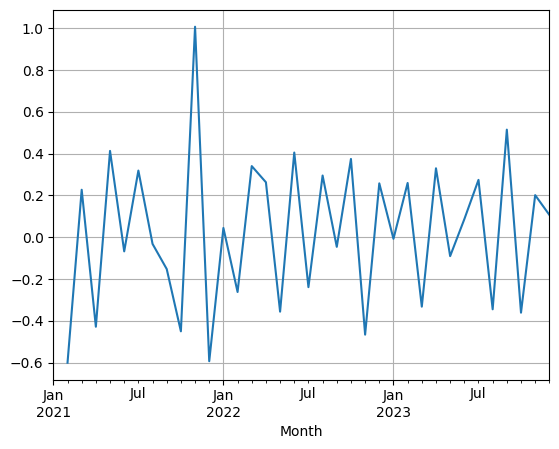

In [42]:
df['Log_diff1'].plot()
plt.grid()
plt.show()

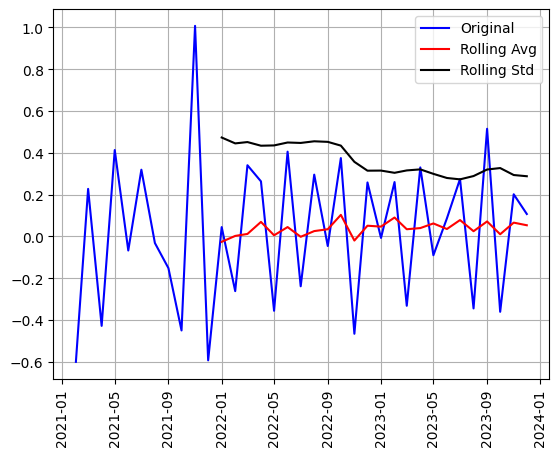

In [43]:
plot_roll_features(df['Log_diff1'])

### Test of Stationarity

<b>1) ADF Test (Augmented Dickey Fuller Test)</b><br>
Ho: Data is not stationary<br>
H1: Data is stationry<br>
alpha = confidence level = 0.05<br>
p>alpha: - Ho is accepted<br>
p<alpha: - H1 is accepted<br>


In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:
def adf_test(data):
    res = adfuller(data)
    print('Adf Statistic',res[0])
    print('p-val',res[1])
    alpha= 0.05
    if res[1]>alpha:
        print('H0 accepted - data is not stationary')
    else:
        print('H1 accepted - data is stationary')

In [46]:
adf_test(df['Sales'])

Adf Statistic 3.0601420836411823
p-val 1.0
H0 accepted - data is not stationary


In [47]:
adf_test(df['Diff1'].dropna())
# d = 1

Adf Statistic -7.249074055553854
p-val 1.7998574141687034e-10
H1 accepted - data is stationary


In [48]:
adf_test(df['Diff2'].dropna())

Adf Statistic -0.7867206933626746
p-val 0.8229916765840699
H0 accepted - data is not stationary


In [49]:
adf_test(df['Log_sales'].dropna())

Adf Statistic 1.7984632993830845
p-val 0.9983459643719065
H0 accepted - data is not stationary


In [50]:
adf_test(df['Log_diff1'].dropna())

Adf Statistic -2.16820214581414
p-val 0.2179879382560354
H0 accepted - data is not stationary


## ARIMA model
1) ARIMA stands for Auto Regressive Integerated Moving Average.<br>
2) ARIMA is used meant for forecasting for a stationary time series data.<br>
3) The predictions made by ARIMA are dependent on 3 factors (p,d,q)

a) <b>Number of AR terms (p) : </b> Number of lags from Auto Regressive Models<br>

b) <b> Number of MA terms (q) : </b> Number of lags from Moving Average Model

c) <b>d :</b>  Number of differenicng required to make the time series stationary

To fetch the values of p and q, we can use ACF and PACF plots
1) <b>ACF(Auto Correlation Function - gives q) </b>- Correlation values between current time series and its lag values

2) <b>PACF (Partial Auto Correlation Function - gives p) </b> - Correlation values between current time series and its lag values but after eliminating variation explained by intervening comparisons.

In [51]:
# June =  85
# July =  92
# Aug  =  100

# ACF -> q

# PACF -> p
#          Actual    Values_after_elimintaing_the_effect
# June =  85               85
# July =  92               87    +  5                   
# Aug  =  100              93    +  6  +  1

### ARIMA Model

In [52]:
df1.head()

,Sales,Lag1,Lag2,Diff1,Diff2,Roll_Mean,Roll_Std
Month,,,,,,,
2021-03-01,183.1,145.9,266.0,37.2,-82.9,164.50,26.304372
2021-04-01,119.3,183.1,145.9,-63.8,-26.6,151.20,45.113413
2021-05-01,180.3,119.3,183.1,61.0,-2.8,149.80,43.133514
2021-06-01,168.5,180.3,119.3,-11.8,49.2,174.40,8.343860
2021-07-01,231.8,168.5,180.3,63.3,51.5,200.15,44.759859


In [53]:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
# order = (p,d,q)
m1 = ARIMA(df1['Diff1'],order=(1,1,1))
ar_m1 = m1.fit()

C:\Users\thang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\thang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\thang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
df1.tail()

,Sales,Lag1,Lag2,Diff1,Diff2,Roll_Mean,Roll_Std
Month,,,,,,,
2023-08-01,407.6,575.5,437.4,-167.9,-29.8,491.55,118.723229
2023-09-01,682.0,407.6,575.5,274.4,106.5,544.80,194.030101
2023-10-01,475.3,682.0,407.6,-206.7,67.7,578.65,146.158972
2023-11-01,581.3,475.3,682.0,106.0,-100.7,528.30,74.953319
2023-12-01,646.9,581.3,475.3,65.6,171.6,614.10,46.386205


In [56]:
fcast_m1 = ar_m1.forecast(10)
fcast_m1   # Since the predictions are negative try another order

2024-01-01   -23.620147
2024-02-01    40.963766
2024-03-01    -5.786681
2024-04-01    28.054630
2024-05-01     3.557873
2024-06-01    21.290375
2024-07-01     8.454324
2024-08-01    17.745974
2024-09-01    11.020014
2024-10-01    15.888744
Freq: MS, Name: predicted_mean, dtype: float64

In [57]:
# order = (p,d,q)
m2 = ARIMA(df1['Diff1'],order=(2,1,3))
ar_m2 = m2.fit()

C:\Users\thang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\thang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\thang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\thang\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [58]:
fcast_m2 = ar_m2.forecast(10)
fcast_m2    # Since the predictions are negative we use pmdARIMA Model to find best order

2024-01-01   -42.925393
2024-02-01    76.922462
2024-03-01   -13.580392
2024-04-01    52.081380
2024-05-01     6.450114
2024-06-01    36.596464
2024-07-01    17.953519
2024-08-01    28.392768
2024-09-01    23.543745
2024-10-01    24.789804
Freq: MS, Name: predicted_mean, dtype: float64

### pmdARIMA Model

In [59]:
# pip install pmdarima

In [60]:
from pmdarima import auto_arima

In [61]:
res = auto_arima(df['Sales'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best 

In [62]:
# Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept

In [63]:
# order= (p,d,q)
m3 = ARIMA(df['Sales'],order=(1,1,2))
m3_fit = m3.fit()

C:\Users\thang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\thang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\thang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [64]:
df.tail()

,Sales,Lag1,Lag2,Diff1,Diff2,Roll_Mean,Roll_Std,Log_sales,Log_diff1
Month,,,,,,,,,
2023-08-01,407.6,575.5,437.4,-167.9,-29.8,491.55,118.723229,6.010286,-0.344953
2023-09-01,682.0,407.6,575.5,274.4,106.5,544.80,194.030101,6.525030,0.514743
2023-10-01,475.3,682.0,407.6,-206.7,67.7,578.65,146.158972,6.163946,-0.361083
2023-11-01,581.3,475.3,682.0,106.0,-100.7,528.30,74.953319,6.365267,0.201321
2023-12-01,646.9,581.3,475.3,65.6,171.6,614.10,46.386205,6.472192,0.106925


In [65]:
# Shampoo Sales Forecasting for next 6 Months
fcast_m3 = m3_fit.forecast(6)
print(fcast_m3)

2024-01-01    560.203771
2024-02-01    586.956131
2024-03-01    589.348230
2024-04-01    589.562123
2024-05-01    589.581249
2024-06-01    589.582959
Freq: MS, Name: predicted_mean, dtype: float64


In [66]:
# Shampoo Sales Forecasting for next(2024) year
fcast_m3 = m3_fit.forecast(12)
print(fcast_m3)

2024-01-01    560.203771
2024-02-01    586.956131
2024-03-01    589.348230
2024-04-01    589.562123
2024-05-01    589.581249
2024-06-01    589.582959
2024-07-01    589.583112
2024-08-01    589.583125
2024-09-01    589.583127
2024-10-01    589.583127
2024-11-01    589.583127
2024-12-01    589.583127
Freq: MS, Name: predicted_mean, dtype: float64
